# Avaliação de Redes Complexas

Nome: Junio Cesar Ferreira

<hr>

**1 -** (a) Crie o gráfo a seguir usando a biblioteca networkx e mostre o gráfo.<br>
Link para visualizar o grafo: https://commons.wikimedia.org/wiki/File:6n-graf.png<br>

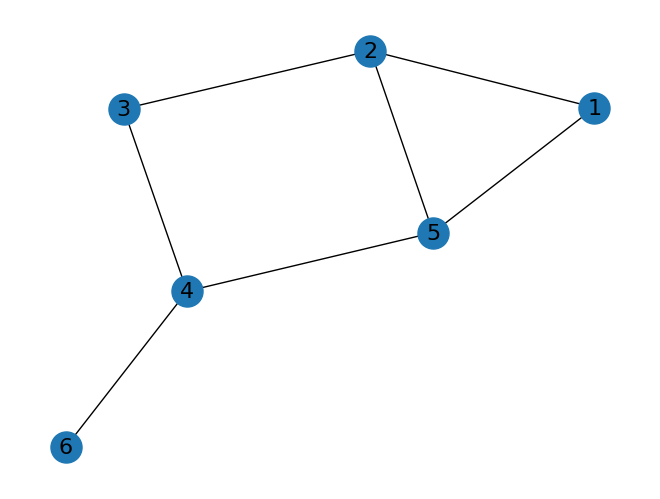

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Matriz de adjacência do grafo.
A = np.array([
#    1  2  3  4  5  6  
    [0, 1, 0, 0, 1, 0], # 1
    [1, 0, 1, 0, 1, 0], # 2
    [0, 1, 0, 1, 0, 0], # 3
    [0, 0, 1, 0, 1, 1], # 4
    [1, 1, 0, 1, 0, 0], # 5
    [0, 0, 0, 1, 0, 0], # 6
    ]) 
# Gera grafo a partir da matriz de adjacência.
G = nx.from_numpy_array(np.array(A), create_using=nx.Graph)  
# Remapeia os labels do grafo.
mapping = {i: i+1 for i in G.nodes()}
# Desenha o grafo com layot fixo.
nx.draw_kamada_kawai(G, with_labels=True, labels=mapping, node_size=500, font_size=16)
plt.show()

(b) Simule uma caminha aleatória nesse grafo e monte uma matriz onde o elemento Mij representa o número de visitas ao vértice j dado que a caminhada iniciou em i. Considere pelo menos 100 passos. Compare o número de visitas com a medida eigenvector centrality de cada vértice.

Matriz de Visitas:
[[12 19 21 26 14  8]
 [14 24 14 21 22  5]
 [15 22 12 23 19  9]
 [18 25 10 15 28  4]
 [14 20 14 22 23  7]
 [16 21 16 18 21  8]]

Node 1: Visits = 12, 	Eigenvector Centrality = 0.40109628015120613
Node 2: Visits = 24, 	Eigenvector Centrality = 0.5023280877603374
Node 3: Visits = 12, 	Eigenvector Centrality = 0.35830784164631824
Node 4: Visits = 15, 	Eigenvector Centrality = 0.4075878178953184
Node 5: Visits = 23, 	Eigenvector Centrality = 0.516251205914231
Node 6: Visits = 8, 	Eigenvector Centrality = 0.16050115266283904


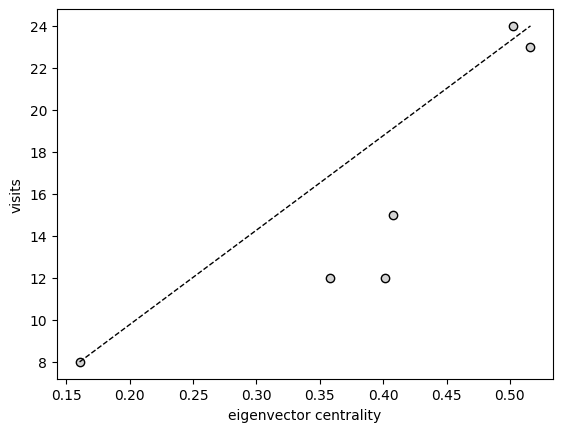

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Matriz de adjacência do grafo.
A = np.array([
#    0  1  2  3  4  5  
    [0, 1, 0, 0, 1, 0], # 0
    [1, 0, 1, 0, 1, 0], # 1
    [0, 1, 0, 1, 0, 0], # 2
    [0, 0, 1, 0, 1, 1], # 3
    [1, 1, 0, 1, 0, 0], # 4
    [0, 0, 0, 1, 0, 0], # 5
    ]) 
# Gera grafo a partir da matriz de adjacência.
G = nx.from_numpy_array(np.array(A), create_using=nx.Graph)  
num_nodes = len(G.nodes())


# Simulação de caminhada aleatória
num_steps = 100
visits_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

for start_node in range(num_nodes):
    current_node = start_node
    for _ in range(num_steps):
        visits_matrix[start_node, current_node] += 1
        neighbors = list(G.neighbors(current_node))
        current_node = np.random.choice(neighbors)

print("Matriz de Visitas:")
print(visits_matrix)


# Cálculo da Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
    
    
# Comparação com eigenvector centrality
print()
for i in range(num_nodes):
    visit_count = visits_matrix[i,i]
    eigenvector_value = eigenvector_centrality[i]
    print(f"Node {i+1}: Visits = {visit_count}, \tEigenvector Centrality = {eigenvector_value}")

X = list()
Y = list()
for i in range(num_nodes):
    X.append(eigenvector_centrality[i])  
    Y.append(visits_matrix[i,i])


plt.plot(X, Y, '-o', color='gray', linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=1)

plt.ylabel("visits")
plt.xlabel("eigenvector centrality")

par = np.polyfit(X, Y, 1, full=True)
plt.plot([min(X), max(X)], [min(Y), max(Y)], '--', linewidth=1, color='black')
plt.show(True)

<hr>

**2 -** (a) Leia a rede do arquivo advogato.txt e mostre a distribuição acumulada complementar do grau, isto é, $P(K > k)$.

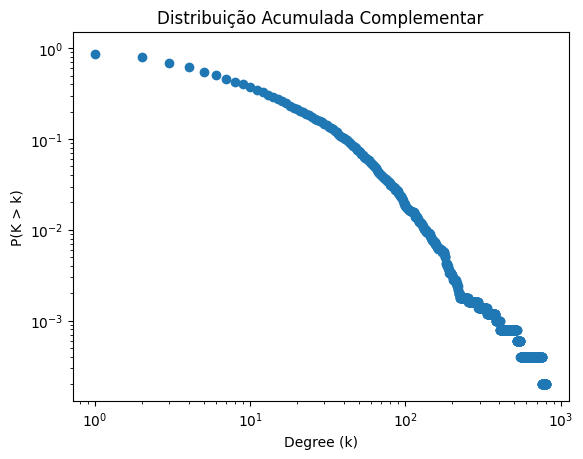

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

filename = "data/advogato.txt"
G = nx.read_edgelist(filename)
G = G.to_undirected()
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Calcula a distribuição de grau.
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_counts = np.bincount(degree_sequence)

# Calcula a distribuição acumulada do grau.
cumulative_degree_counts = np.cumsum(degree_counts)

# Calcula a distribuição acumulada complementar do grau.
ccdf = 1 - cumulative_degree_counts / G.number_of_nodes()

# Gráfico da distribuição acumulada complementar do grau.
plt.loglog(range(len(ccdf)), ccdf, marker='o', linestyle='None')
plt.xlabel('Degree (k)')
plt.ylabel('P(K > k)')
plt.title('Distribuição Acumulada Complementar')
plt.show()

(b) Mostre o gráfico de Knn(k), ou seja, o grau médio dos vizinhos dos vértices de grau k em função do grau k.

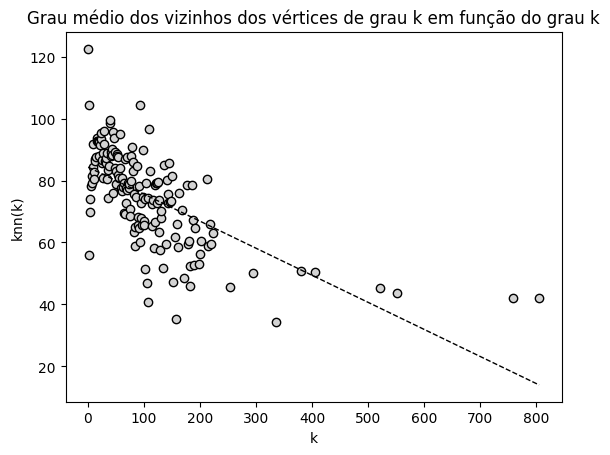

In [4]:
from numpy  import *

# Calcula Knn.
knn = []
for i in G.nodes():
    aux =  nx.average_neighbor_degree(G, nodes = [i])
    knn.append(float(aux[i]))
    
knn = np.array(knn)

vk = dict(G.degree())
vk = list(vk.values())

knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)+1):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux])
        knnk.append(av_knn)
        ks.append(k)

plt.plot(ks, knnk, '-o', color='gray',linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=1)

plt.ylabel("knn(k)")
plt.xlabel("k")

par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '--', linewidth=1, color='black')
plt.title("Grau médio dos vizinhos dos vértices de grau k em função do grau k")
plt.show(True)

(c) Calcule a matriz de menores distâncias $D$ a matriz $A^n$, que presenta o número de caminhadas de comprimento $n$ entre cada par de vértices. Faça um gráfico da correlação entre $D_{ij}$ e $A_{ij}$ para diferentes valores de $n$. Ou seja, um gráfico em que o eixo x representa n e o y, a correlação entre essas duas matrizes.

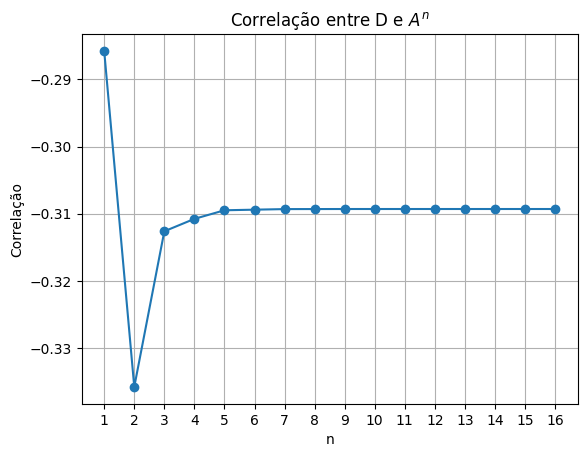

In [10]:
from numpy  import *
import scipy.sparse as sp
import scipy.sparse.csgraph as csgraph

A = nx.adjacency_matrix(G).toarray()

adj_sparse = sp.csr_matrix(A)
D = csgraph.shortest_path(adj_sparse, method='D', directed=False)

# Calcula potênciação 
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors_inv = np.linalg.inv(eigenvectors)
correlations = []
n_values = range(1, 17)
for n in n_values:
    d_power = np.diag(eigenvalues ** n)
    A_power = eigenvectors @ d_power @ eigenvectors_inv
    correlation = np.corrcoef(D.flatten(), A_power.flatten().real.round(0))[0, 1]
    correlations.append(correlation)

# Plotar o gráfico da correlação
plt.plot(n_values, correlations, marker='o')
plt.xlabel('n')
plt.xticks(n_values)
plt.ylabel('Correlação')
plt.title('Correlação entre D e $A^n$')
plt.grid(True)
plt.show()

<hr>

**3 -** Considere a rede do arquivo internet_routers-22july06.gml. Escreva um código que calcule as seguintes medidas: (a) grau médio, (b) transitividade, (c) segundo momento da distribuição do grau, (d) entropia de Shannon da distribuição do grau, (e) coeficiente de assortatividade. Considere apenas o maior componente. Armazene os valoes em uma lista e imprima essa lista, indicando os valores de cada medida. 

In [6]:
import math
import networkx as nx

G = nx.read_gml("data/internet_routers-22july06.gml")

G = G.to_undirected()
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Função para calcular as medidas.
def degree_measures(G):
    
    # Momentos do grau.
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M
    
    # Distribuição do grau.
    def degree_distribution(G):
        vk = dict(G.degree())
        vk = list(vk.values())
        vk = np.array(vk)
        maxk = np.max(vk)
        mink = np.min(vk)
        kvalues= np.arange(mink, maxk+1)
        Pk = np.zeros(maxk+1) 
        for k in vk:
            Pk[k] = Pk[k] + 1
        Pk = Pk/sum(Pk)
        return kvalues,Pk
    
    # Entropia de Shannon.
    def degree_shannon_entropy(G):
        k,Pk = degree_distribution(G)
        H = 0
        for p in Pk:
            if(p > 0):
                H = H - p*math.log(p, 2)
        return H
    
    k1 = momment_of_degree_distribution(G,1)
    transitivity = nx.transitivity(G)
    k2 = momment_of_degree_distribution(G,2)
    shannon_entropy = degree_shannon_entropy(G)
    assortativity=nx.degree_assortativity_coefficient(G)

    return  k1, transitivity, k2, shannon_entropy, assortativity

# Calcula medidas.
measures = degree_measures(G)

# Apresenta resultados.
print("Medidas:")
print("(a) Grau médio:\t\t", measures[0])
print("(b) Transitividade:\t", measures[1])
print("(c) Segundo momento:\t", measures[2])
print("(d) Entropia de Shannon:", measures[3])
print("(e) Assortatividade:\t", measures[4])

Medidas:
(a) Grau médio:		 4.218612550624918
(b) Transitividade:	 0.011146383847822162
(c) Segundo momento:	 1103.0002177415843
(d) Entropia de Shannon: 2.3657964585920395
(e) Assortatividade:	 -0.1983848751205647


<hr>

**4 -** Simule o modelo de propagação de epidemias SIR na rede de aeroportos dos EUA (USairport_2010.txt). Calcule a correlação de Pearson entre a fração final de recuperados e as seguintes medidas de centralidade: (a) grau, (b) betweenness centrality, (c) eigenvector centrality, (d) closenness centrality. Mostre os resultados e indique a maior correlação. Considere $\beta = 0.6$ e $\mu = 0.1$ no modelo SIR.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

# Carrega a rede de aeroportos dos EUA
G = nx.read_edgelist("data/USairport_2010.txt")
G = G.to_undirected()
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

def find(v, i):
    return [pos for pos, x in enumerate(v) if x == i]

# Função para simular a dinâmica do SIR a partir de um único vértice de semente
# retorna fração de recuperados
def simulate_SIR(G, seed, beta, mu):    
    N = len(G.nodes())
    vector_states = np.zeros(N) 
    vector_states[seed] = 1
    num_intected = 1
    list_recovered = list()
    
    # Simulação enquanto houver infectados
    while num_intected > 0:
        infected = find(vector_states,1)
        
        # Tenta infectar visinhos
        for i in infected:
            neigs = G.neighbors(i)
            for j in neigs:
                if np.random.rand() < beta:
                    if(vector_states[j] != 2):
                        vector_states[j] = 1
                        
        # Tenta recuperar vértices infectados 
        for k in infected: 
            if np.random.rand() < mu:
                vector_states[k] = 2
                
        num_intected = len(find(vector_states,1))
        list_recovered.append(len(find(vector_states,2))/N)
        
    return len(list_recovered)/N

# Parâmetros da epidemia
beta = 0.1 # Probabilidade de infecção
mu = 0.1   # Probabilidade de recuperação

for b in range(6):
    N = len(G.nodes())
    fraction_recovered = np.zeros(shape=N)

    print(f"beta={beta+0.1*b}")

    num_simul = 10
    # Como em diferentes execuções houve uma pequena diferença no resultado, optei por fazer a média em 10 simulações.
    for _ in range(num_simul):
        # Simula inicio em todos vértices da rede.
        for seed in range(N):
            fraction_recovered[seed] += simulate_SIR(G, seed, beta+0.1*b, mu)
    
    for seed in range(N):
        fraction_recovered[seed] = fraction_recovered[seed] / num_simul
    
    # Medidas de centralidade.
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)

    # Cálculo da correlação de Pearson.
    correlation_degree = np.corrcoef(list(degree_centrality.values()), fraction_recovered)[0,1]
    correlation_betweenness = np.corrcoef(list(betweenness_centrality.values()), fraction_recovered)[0,1]
    correlation_eigenvector = np.corrcoef(list(eigenvector_centrality.values()), fraction_recovered)[0,1]
    correlation_closeness = np.corrcoef(list(closeness_centrality.values()), fraction_recovered)[0,1]

    results = {
        "Degree Centrality": correlation_degree,
        "Betweenness Centrality": correlation_betweenness,
        "Eigenvector Centrality": correlation_eigenvector,
        "Closeness Centrality": correlation_closeness
    }
    results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Correlation"])
    print(results_df)
    print("Maior correlação:", results_df["Correlation"].idxmax())

beta=0.1
                        Correlation
Degree Centrality          0.352099
Betweenness Centrality     0.132977
Eigenvector Centrality     0.336392
Closeness Centrality       0.466227
Maior correlação: Closeness Centrality
beta=0.2
                        Correlation
Degree Centrality          0.267416
Betweenness Centrality     0.098710
Eigenvector Centrality     0.251433
Closeness Centrality       0.376942
Maior correlação: Closeness Centrality
beta=0.30000000000000004
                        Correlation
Degree Centrality          0.181800
Betweenness Centrality     0.054147
Eigenvector Centrality     0.168185
Closeness Centrality       0.268687
Maior correlação: Closeness Centrality
beta=0.4
                        Correlation
Degree Centrality          0.146084
Betweenness Centrality     0.068092
Eigenvector Centrality     0.133847
Closeness Centrality       0.235103
Maior correlação: Closeness Centrality
beta=0.5
                        Correlation
Degree Centrality          

<hr>

**5 -** Gere redes do tipo BA, ER e WS (p=0.05) com grau médio igual a 10 e N = 500. Desenvolva um estudo para mostrar que essas apresentam topologias diferentes. (Seja criativ@).

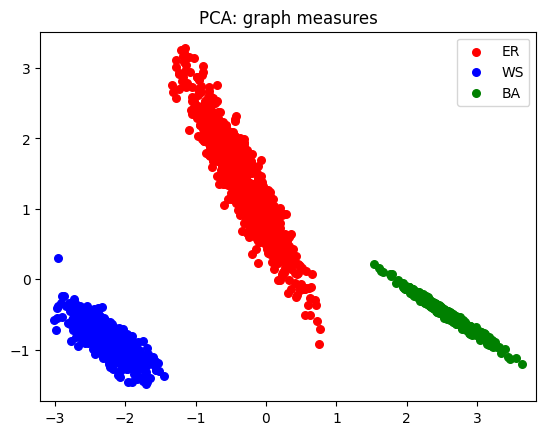

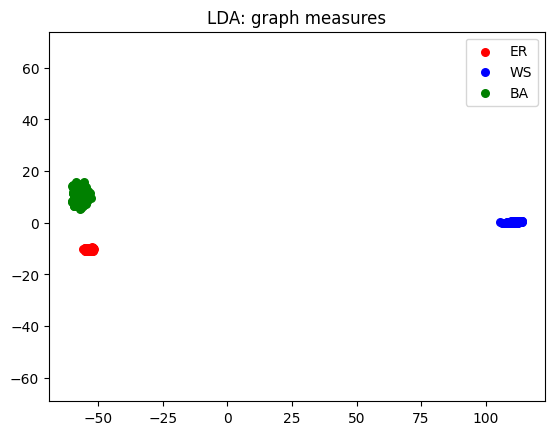

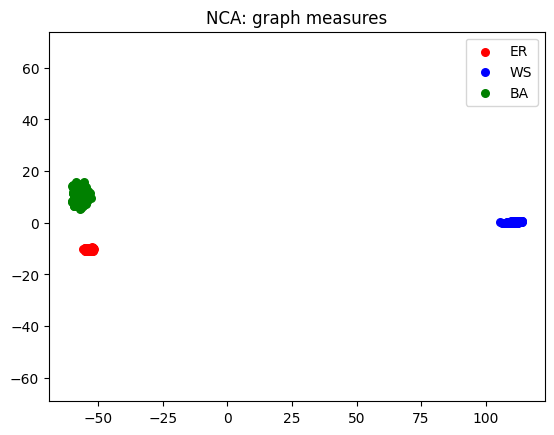

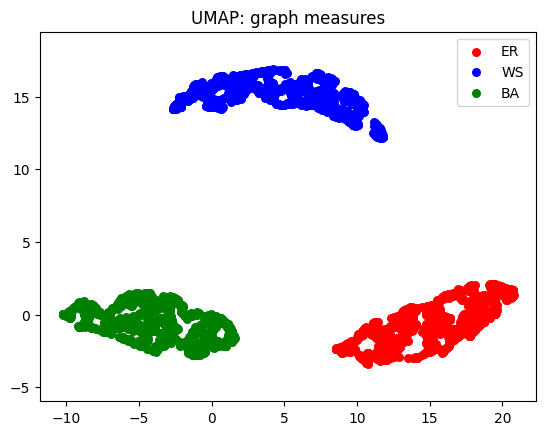

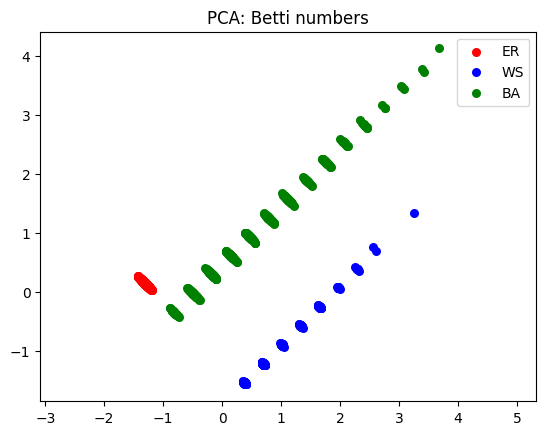

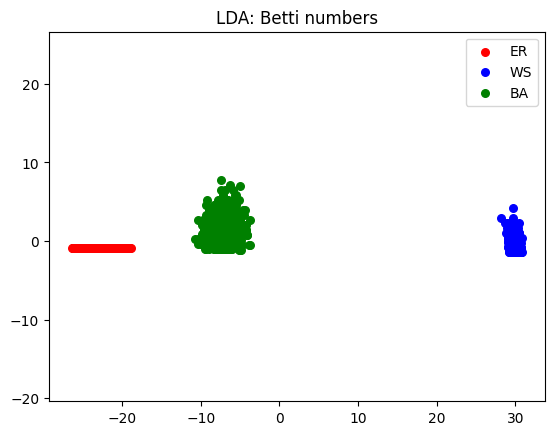

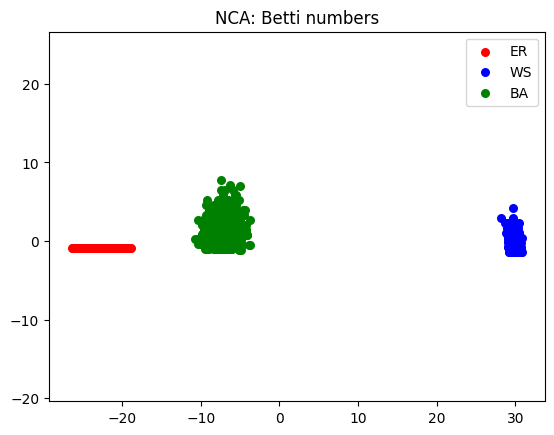

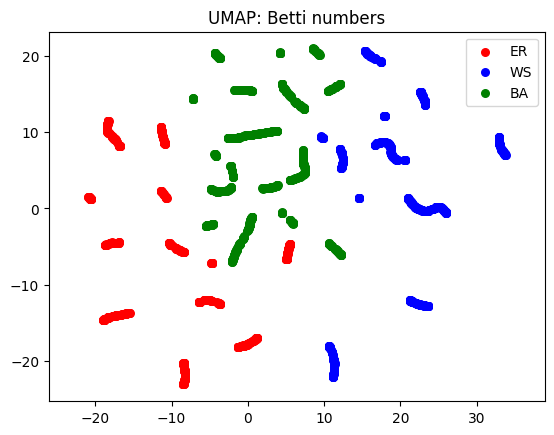

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import gudhi
import umap

# Calcula algumas medidas de redes complexas
def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1, k2, variance, av_cl, l, r

# Calcula números de Betti da rede
def betti_numbers(G):
    # Obter a lista de cliques para cada rede
    cliques = list(nx.enumerate_all_cliques(G))

    # Criar o complexo simplicial a partir das listas de cliques
    complex = gudhi.SimplexTree()
    for clique in cliques:
        complex.insert(clique)

    # Calcula homologia do complexo simplicial
    complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)

    # Retorna números de Betti da homologia calculada
    betti_num = complex.betti_numbers()
    
    # homogenização do tamanho do vetor a ser retornado
    vector_len = 4
    betti_num = betti_num[:vector_len]
    if (len(betti_num) < vector_len):
        betti_num = np.pad(betti_num, (0, vector_len - len(betti_num)), mode='constant')
    
    return betti_num

# Parâmetros de simulação
n_nets = 1000  # Quantidade de redes
n_nodes = 500  # Quantidade de vértices
av_degree = 10 # Grau médio

# Vetores para impressão de resultados
X_measures = []
X_betti_num = []
y = []


#ER networks
p = av_degree/(n_nodes-1)
for i in range(0,n_nets):
    GER = nx.gnp_random_graph(n_nodes, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GER)
    x = [k1,k2,variance,av_cl,l,r]
    X_measures.append(x)
    x = betti_numbers(GER)
    X_betti_num.append(x)
    y.append(0)

#WS networks
k = int(av_degree)
p = 0.05 #probability of rewiring
for i in range(0,n_nets):
    GWS = nx.watts_strogatz_graph(n_nodes, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r]
    X_measures.append(x)
    x = betti_numbers(GWS)
    X_betti_num.append(x)
    y.append(1)

# BA networks
m = int(av_degree/2)
for i in range(0,n_nets):
    GBA = nx.barabasi_albert_graph(n_nodes, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GBA)
    x = [k1,k2,variance,av_cl,l,r]
    X_measures.append(x)
    x = betti_numbers(GBA)
    X_betti_num.append(x)
    y.append(2)
    
y = np.array(y)

# Padroniza os recursos removendo a média e dimensionando para a variância da unidade.
scaler = StandardScaler().fit(X_measures)
X_measures = scaler.transform(X_measures)

scaler = StandardScaler().fit(X_betti_num)
X_betti_num = scaler.transform(X_betti_num)

# Reduz para 2 dimensões com PCA (Principal Component Analysis)
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=0))

# Reduz para 2 dimensões com LDA (Linear Discriminant Analysis)
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduz para 2 dimensões com NCA (Neighborhood Component Analysis)
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2, random_state=0))

# Reduz para 2 dimensões com UMAP (Uniform Manifold Approximation and Projection)
uma = umap.UMAP()

dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca), ("UMAP", uma)]

cl = ['ER','WS','BA']

# Cores para classificação
colors = ['red', 'blue', 'green' ]

# Mostra gráfico para cada método de projeção
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    # Ajusta o modelo do método
    model.fit(X_measures, y)
    X_embedded = model.transform(X_measures)
    
    for j in range(len(cl)):
        plt.scatter(
            X_embedded[y == j, 0],
            X_embedded[y == j, 1],
            c=colors[j],
            s=30,
            label=cl[j],
        )
    plt.legend()
    plt.title(name + ": graph measures")
    plt.axis('equal')
    
plt.show()

# Mostra gráfico para cada método de projeção
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    model.fit(X_betti_num, y)
    X_embedded = model.transform(X_betti_num)
    
    for j in range(len(cl)):
        plt.scatter(
            X_embedded[y == j, 0],
            X_embedded[y == j, 1],
            c=colors[j],
            s=30,
            label=cl[j],
        )
    plt.legend()
    plt.title(name + ": Betti numbers")
    plt.axis('equal')
plt.show()